In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

## Load Train Data

In [3]:
data = pd.read_csv("../data/train_data.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3407-JMJQQ,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.00,7661.8,No
1,8080-DDEMJ,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.10,45.1,Yes
2,4893-GYUJU,Female,0,No,No,50,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.35,1033,No
3,6427-FEFIG,Female,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),78.60,1846.65,No
4,8821-KVZKQ,Female,0,Yes,Yes,70,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),58.40,4113.15,No


## Basic Infos about the Data

In [4]:
# Memory Usage in megabytes
print(f"Dataset's memory size: {data.memory_usage().sum()/1e6:.1f} MB")

Dataset's memory size: 1.1 MB


In [5]:
# Dataset's Shape & Size
print(f"Number of Columns: {data.shape[1]}")
print(f"Number of Rows(records): {data.shape[0]}")

print(f"Size: {data.size}")

Number of Columns: 21
Number of Rows(records): 6338
Size: 133098


In [6]:
# Check Features, Non-Null Counts, Dtypes and thier count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


## Univariate Analysis

### Churn

In [15]:
churn = data.Churn.map(dict(zip(["No","Yes"],[0,1])))

# Data Type
print(churn.dtype,", Categorical Binary")

int64 , Categorical Binary


In [16]:
# Descriptive Statistics
churn.describe()

count    6337.000000
mean        0.265267
std         0.441510
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

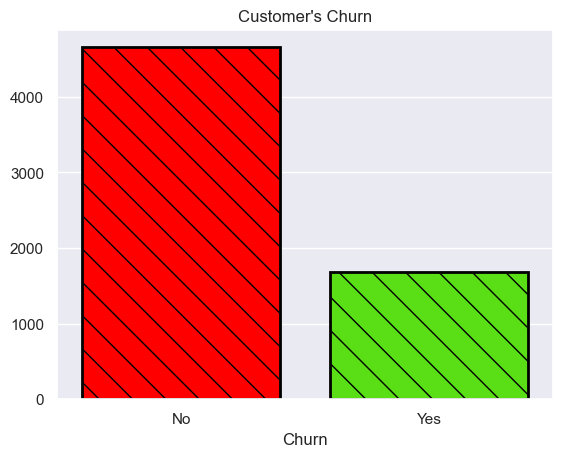

In [17]:
sns.barplot(x=churn.value_counts()[::-1].index,y=churn.value_counts()[::-1].values,palette=sns.color_palette(["#ff0000","#5adf17"]),saturation=1,lw=2,ec="black",hatch="\\")
plt.title("Customer's Churn")
plt.xticks(ticks=[0,1],labels=["No","Yes"])

plt.savefig("../visualizations/exploration/churn.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Bern~(0.26)**

### Gender

In [13]:
gender = data.gender.map(dict(zip(["Female","Male"],[0,1])))

# Data Type
print(gender.dtype,", Categorical Binary")

int64 , Categorical Binary


In [14]:
# Descriptive Statistics
gender.describe()

count    6338.000000
mean        0.505364
std         0.500011
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

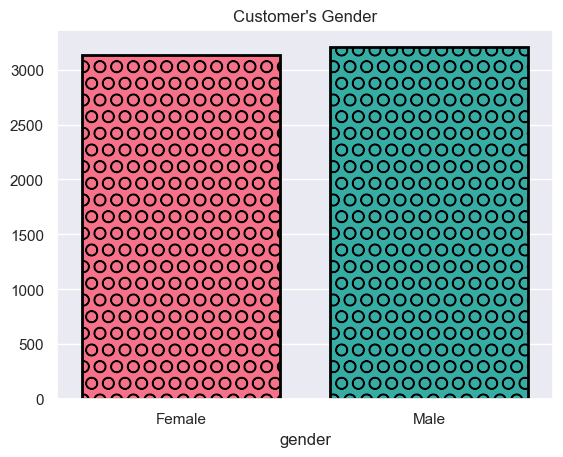

In [15]:
sns.barplot(x=gender.value_counts()[::-1].index,y=gender.value_counts()[::-1].values,palette=sns.color_palette("husl",2),saturation=1,lw=2,ec="black",hatch="O")
plt.title("Customer's Gender")
plt.xticks(ticks=[0,1],labels=["Female","Male"])

plt.savefig("../visualizations/exploration/gender.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Bern~(0.505)**

In [16]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(gender):.2%}")

Correlation Cofficient: -1.07%


**Gender** dont have an impact on **Churn**.

### Senior Citizen

In [7]:
senior_citizen = data.SeniorCitizen

# Data Type
print(senior_citizen.dtype,", Categorical Binary")

int64 , Categorical Binary


In [8]:
# Descriptive Statistics
senior_citizen.describe()

count    6338.000000
mean        0.162196
std         0.368660
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

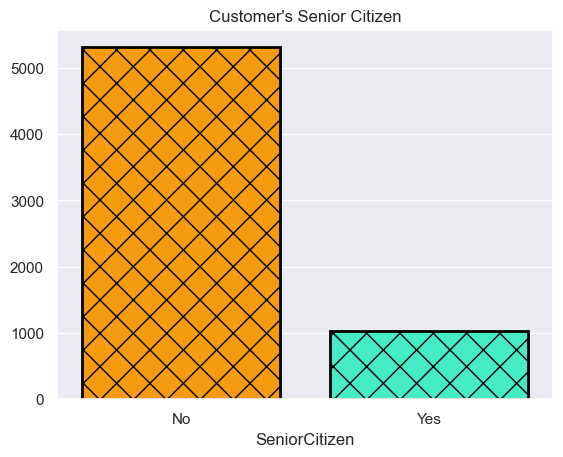

In [9]:
sns.barplot(x=senior_citizen.value_counts()[::-1].index,y=senior_citizen.value_counts()[::-1].values,palette=sns.color_palette(["#f59b0f","#45ebc5"]),saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's Senior Citizen")
plt.xticks(ticks=[0,1],labels=["No","Yes"])

plt.savefig("../visualizations/exploration/senior_citizen.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Bern~(0.16)**

In [10]:
Q1 = senior_citizen.quantile(.25)
Q3 = senior_citizen.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 0.0
Upper Bound: 0.0
Lower Bound: 0.0


In [11]:
# Outlier detection Using IQR
iqr_outliers = senior_citizen[(senior_citizen > upper_bound) |  (senior_citizen < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  1028
IQR Outliers:  Index([   1,   27,   41,   42,   48,   62,   63,   81,   99,  105,
       ...
       6264, 6266, 6275, 6279, 6282, 6297, 6301, 6304, 6311, 6335],
      dtype='int64', length=1028)


In [12]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(senior_citizen)
zscore_outliers = senior_citizen[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  0
ZScore Outliers:  Index([], dtype='int64')


In [13]:
# Remove Small Subset of IQR Outliers
data = data[~data.index.isin(np.random.choice(iqr_outliers,size=100))]

In [18]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(senior_citizen):.2%}")

Correlation Cofficient: 14.41%


**Senior Citizen** have a low impact on **Churn**.

### Partner

In [25]:
partner = data.Partner.map(dict(zip(["No","Yes"],[0,1])))

# Data Type
print(partner.dtype,", Categorical Binary")

int64 , Categorical Binary


In [26]:
# Descriptive Stats
partner.describe()

count    6337.000000
mean        0.480196
std         0.499647
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Partner, dtype: float64

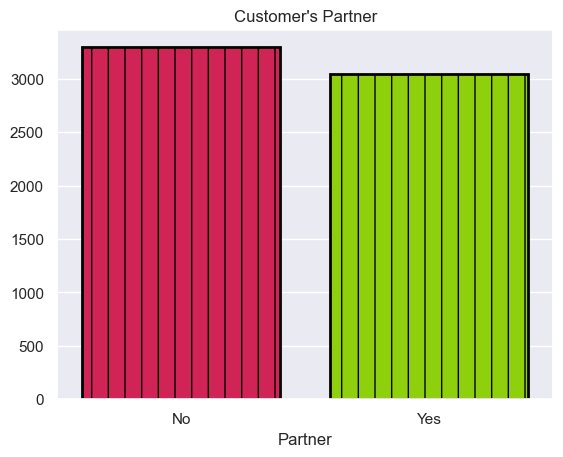

In [27]:
sns.barplot(x=partner.value_counts()[::-1].index,y=partner.value_counts()[::-1].values,palette=sns.color_palette(["#cf2455","#8fd00d"]),saturation=1,lw=2,ec="black",hatch="|")
plt.title("Customer's Partner")
plt.xticks(ticks=[0,1],labels=["No","Yes"])

plt.savefig("../visualizations/exploration/partner.png", dpi=300, bbox_inches='tight')
plt.show()

In [28]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(partner):.2%}")

Correlation Cofficient: -14.47%


**Partner** have a low impact on **Churn**.

### Dependents

In [29]:
dependents = data.Dependents.map(dict(zip(["No","Yes"],[0,1])))

# Data Type
print(dependents.dtype,", Categorical Binary")

int64 , Categorical Binary


In [30]:
# Descriptive Stats
dependents.describe()

count    6337.000000
mean        0.295408
std         0.456262
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Dependents, dtype: float64

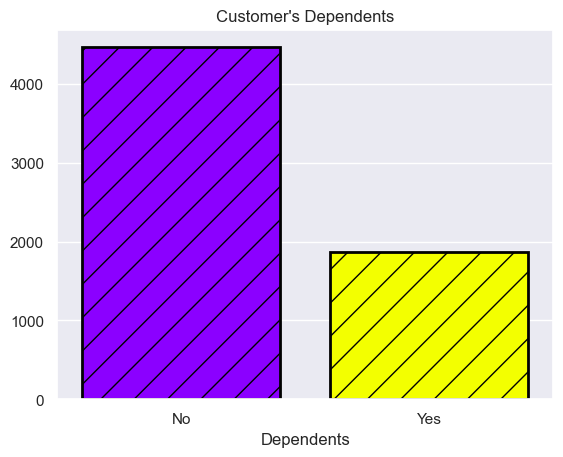

In [31]:
sns.barplot(x=dependents.value_counts()[::-1].index,y=dependents.value_counts()[::-1].values,palette=sns.color_palette(["#8b00ff","#f3ff00"]),saturation=1,lw=2,ec="black",hatch="/")
plt.title("Customer's Dependents")
plt.xticks(ticks=[0,1],labels=["No","Yes"])

plt.savefig("../visualizations/exploration/dependents.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Bern~(0.29)**

In [32]:
Q1 = dependents.quantile(.25)
Q3 = dependents.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 2.5
Lower Bound: -1.5


In [33]:
# Outlier detection Using IQR
iqr_outliers = dependents[(dependents > upper_bound) |  (dependents < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [34]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(dependents)
zscore_outliers = dependents[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  0
ZScore Outliers:  Index([], dtype='int64')


**Dependents** dont have any outliers.

In [35]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(dependents):.2%}")

Correlation Cofficient: -16.42%


**Partner** have a low impact on **Churn**.

### Tenure
The number of months the customer has been with the company.

In [36]:
tenure = data.tenure

# Data Type
print(tenure.dtype)

int64


In [37]:
# Descriptive Statistics
tenure.describe()

count    6337.000000
mean       32.256273
std        24.550324
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

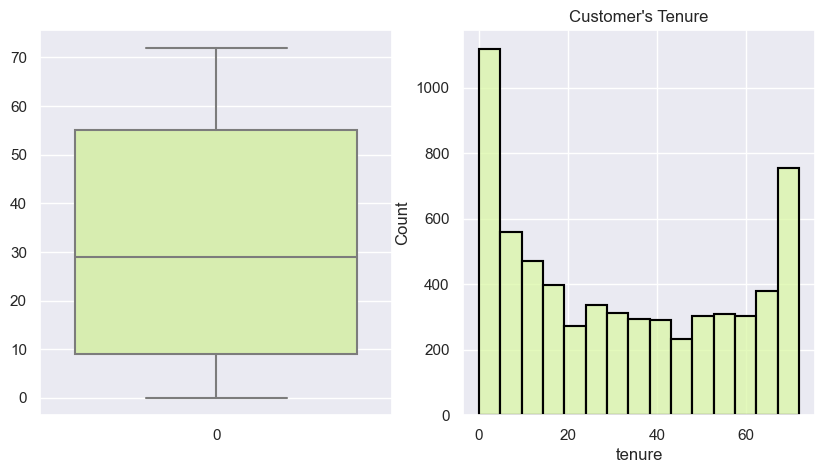

In [38]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(tenure,color="#DAF7A6",ax=axs[0])
sns.histplot(x=tenure,lw=2,ec="black",color="#DAF7A6",ax=axs[1])
plt.title("Customer's Tenure")

plt.savefig("../visualizations/exploration/tenure.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **N~(32.2,600.25)**

In [39]:
Q1 = tenure.quantile(.25)
Q3 = tenure.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 46.0
Upper Bound: 124.0
Lower Bound: -60.0


In [40]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(tenure)
zscore_outliers = tenure[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  0
ZScore Outliers:  Index([], dtype='int64')


In [41]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(tenure):.2%}")

Correlation Cofficient: -34.98%


**Tenure** has a middle lower impact on **Churn**  

### Phone Service

In [19]:
phone_service = data.PhoneService.map(dict(zip(["No","Yes"],[0,1])))

# Data Type
print(phone_service.dtype,", Categorical Binary")

int64 , Categorical Binary


In [20]:
# Descriptive Statistics
phone_service.describe()

count    6337.000000
mean        0.901688
std         0.297759
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PhoneService, dtype: float64

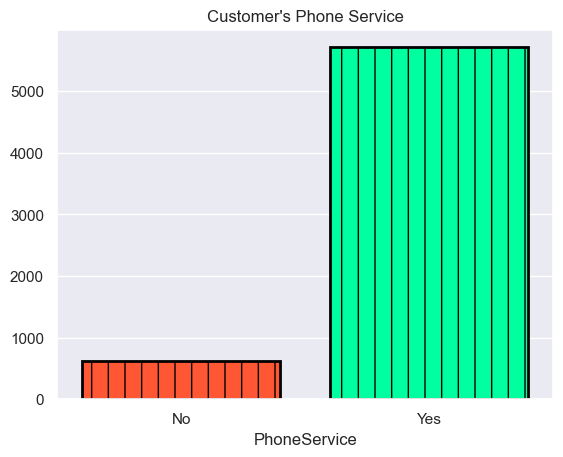

In [21]:
sns.barplot(x=phone_service.value_counts()[::-1].index,y=phone_service.value_counts()[::-1].values,palette=sns.color_palette(["#FF5733","#00ff9e"]),saturation=1,lw=2,ec="black",hatch="|")
plt.title("Customer's Phone Service")
plt.xticks(ticks=[0,1],labels=["No","Yes"])

plt.savefig("../visualizations/exploration/phone_service.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Bern~(0.9)**

In [22]:
Q1 = phone_service.quantile(.25)
Q3 = phone_service.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 0.0
Upper Bound: 1.0
Lower Bound: 1.0


In [23]:
# Outlier detection Using IQR
iqr_outliers = phone_service[(phone_service > upper_bound) |  (phone_service < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  623
IQR Outliers:  Index([   4,   17,   19,   26,   32,   40,   48,   58,   69,   78,
       ...
       6227, 6230, 6237, 6266, 6273, 6286, 6292, 6297, 6305, 6335],
      dtype='int64', length=623)


In [24]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(phone_service)
zscore_outliers = phone_service[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  623
ZScore Outliers:  Index([   4,   17,   19,   26,   32,   40,   48,   58,   69,   78,
       ...
       6227, 6230, 6237, 6266, 6273, 6286, 6292, 6297, 6305, 6335],
      dtype='int64', length=623)


In [25]:
# Check Shared Outliers Between the Two Methods
outliers = []
for index in iqr_outliers.index:
    if index in zscore_outliers.index:
        outliers.append(index)
print("Number of Shared Outliers: ",zscore_outliers.count())
print("Shared Outliers: ",outliers[:10],"...")

Number of Shared Outliers:  623
Shared Outliers:  [4, 17, 19, 26, 32, 40, 48, 58, 69, 78] ...


In [26]:
# Remove Shared Outliers
data = data[~data.index.isin(outliers)]

In [27]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(phone_service):.2%}")

Correlation Cofficient: 1.35%


**Phone Service** dont have an impact on **Churn**.

### Multiple Lines
Whether the customer has multiple lines for their phone service.

In [28]:
multiple_lines = data.MultipleLines.map(dict(zip(["No","Yes"],[0,1])))

# Data Types
print(multiple_lines.dtype,", Categorical Binary")

int64 , Categorical Binary


In [29]:
# Descriptive Statistics
multiple_lines.describe()

count    5714.000000
mean        0.470074
std         0.499147
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: MultipleLines, dtype: float64

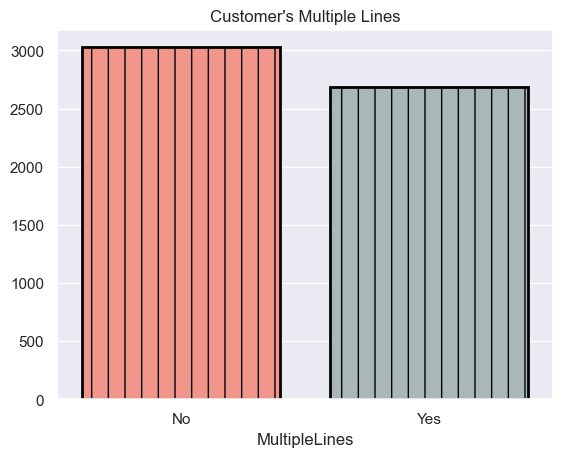

In [30]:
sns.barplot(x=multiple_lines.value_counts()[::-1].index,y=multiple_lines.value_counts()[::-1].values,palette=sns.color_palette(["#f1948a","#aab7b8"]),saturation=1,lw=2,ec="black",hatch="|")
plt.title("Customer's Multiple Lines")
plt.xticks(ticks=[0,1],labels=["No","Yes"])

plt.savefig("../visualizations/exploration/multiple_lines.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Bern~(.47)**

In [54]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(multiple_lines):.2%}")

Correlation Cofficient: 3.82%


**Multiple Lines** dont have an impact on **Churn**.

### InternetService
The type of internet service the customer has (e.g., "DSL", "Fiber optic", "No").

In [31]:
# OneHot Encoding should be used but Ordinal were used only for exploration 
internet_service = data.InternetService.map(dict(zip(["No","DSL","Fiber optic"],[0,1,2])))

# Data Type
print(internet_service.dtype,", Categorical Multinomial")

int64 , Categorical Multinomial


In [32]:
# Descriptive Statistics
internet_service.describe()

count    5714.000000
mean        1.246587
std         0.816378
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: InternetService, dtype: float64

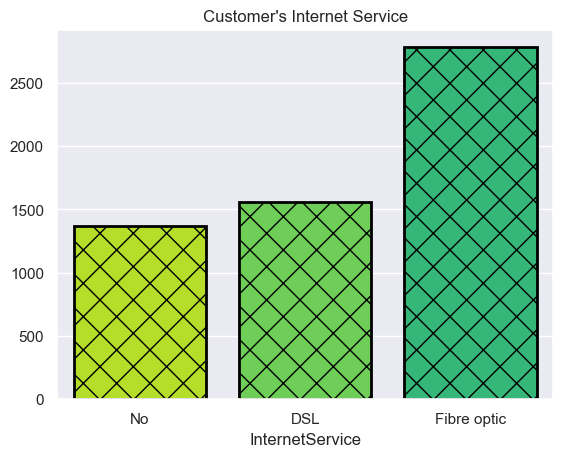

In [33]:
sns.barplot(x=internet_service.value_counts()[::-1].index,y=internet_service.value_counts()[::-1].values,palette=sns.color_palette("viridis_r", 8),saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's Internet Service")
plt.xticks(ticks=[0,1,2],labels=["No","DSL","Fibre optic"])

plt.savefig("../visualizations/exploration/internet_service.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.24,0.27,0.48)**

In [34]:
Q1 = internet_service.quantile(.25)
Q3 = internet_service.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 3.5
Lower Bound: -0.5


In [35]:
# Outlier detection Using IQR
iqr_outliers = internet_service[(internet_service > upper_bound) |  (internet_service < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [36]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(internet_service):.2%}")

Correlation Cofficient: 33.11%


**Internet Service** has a middle lower impact on **Churn**.

### Online Security:
Whether the customer has online security (e.g., "Yes", "No", or "No internet service").

In [61]:
online_security = data.OnlineSecurity.map(dict(zip(["No internet service","No","Yes"],[0,1,2])))

# Data Type
print(online_security.dtype,", Categorical Multinomial")

int64 , Categorical Multinomial


In [62]:
# Descriptive Statistics
online_security.describe()

count    5714.000000
mean        1.030277
std         0.714159
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: OnlineSecurity, dtype: float64

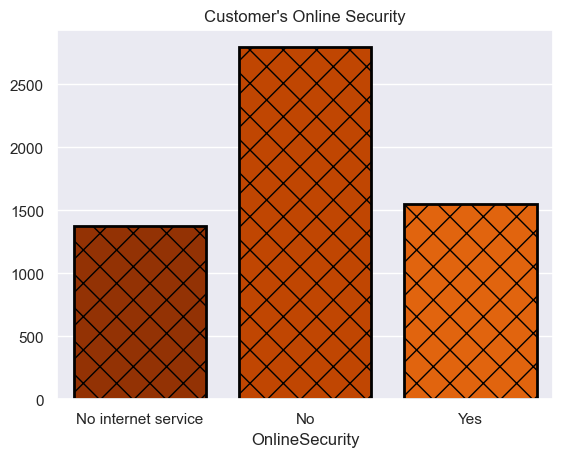

In [63]:
sns.barplot(x=online_security.value_counts()[::-1].index,y=online_security.value_counts()[::-1].values,palette=sns.color_palette("YlOrBr_r", 8),saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's Online Security")
plt.xticks(ticks=[0,1,2],labels=["No internet service","No","Yes"])

plt.savefig("../visualizations/exploration/online_security.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.24,0.49,0.27)**

In [64]:
Q1 = online_security.quantile(.25)
Q3 = online_security.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 3.5
Lower Bound: -0.5


In [65]:
# Outlier detection Using IQR
iqr_outliers = online_security[(online_security > upper_bound) |  (online_security < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [66]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(online_security):.2%}")

Correlation Cofficient: 4.86%


**Online Security** dont have an impact on **Churn**.

### Online Backup:
Whether the customer has online backup (e.g., "Yes", "No", or "No internet service").

In [67]:
online_backup = data.OnlineBackup.map(dict(zip(["No internet service","No","Yes"],[0,1,2])))

# Data Type
print(online_backup.dtype,", Categorical Multinomial")

int64 , Categorical Multinomial


In [68]:
# Descriptive Statistics
online_backup.describe()

count    5714.000000
mean        1.097655
std         0.754183
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: OnlineBackup, dtype: float64

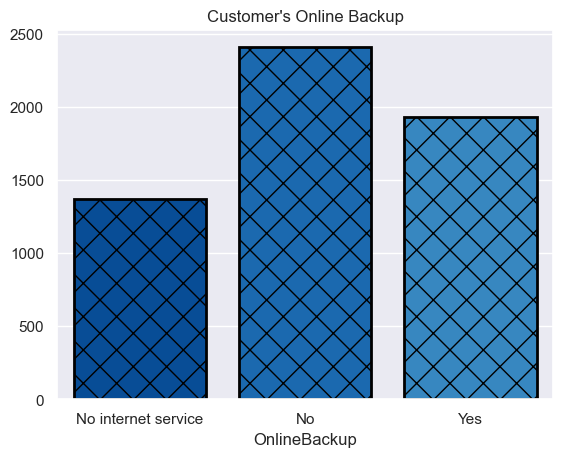

In [69]:
sns.barplot(x=online_backup.value_counts()[::-1].index,y=online_backup.value_counts()[::-1].values,palette=sns.color_palette("Blues_r", 8),saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's Online Backup")
plt.xticks(ticks=[0,1,2],labels=["No internet service","No","Yes"])

plt.savefig("../visualizations/exploration/online_backup.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.24,0.42,0.33)**

In [70]:
Q1 = online_backup.quantile(.25)
Q3 = online_backup.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 3.5
Lower Bound: -0.5


In [71]:
# Outlier detection Using IQR
iqr_outliers = online_backup[(online_backup > upper_bound) |  (online_backup < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [72]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(online_backup):.2%}")

Correlation Cofficient: 9.38%


**Online Backup** has a low impact on **Churn**.

### Device Protection:
Whether the customer has device protection (e.g., "Yes", "No", or "No internet service").

In [73]:
device_protection = data.DeviceProtection.map(dict(zip(["No internet service","No","Yes"],[0,1,2])))

# Data Type
print(device_protection.dtype,", Categorical Multinomial")

int64 , Categorical Multinomial


In [74]:
# Descriptive Statistics
device_protection.describe()

count    5714.000000
mean        1.091530
std         0.750883
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: DeviceProtection, dtype: float64

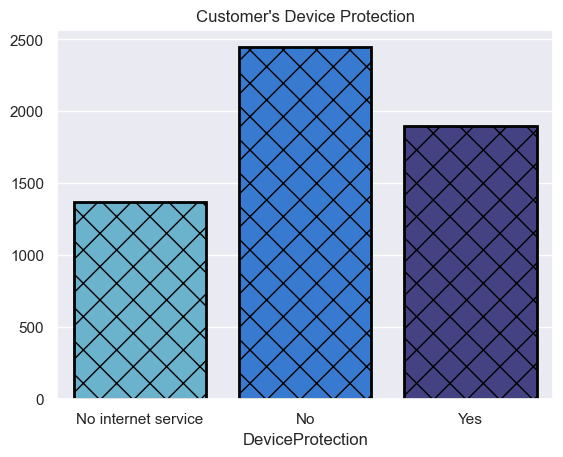

In [75]:
sns.barplot(x=device_protection.value_counts()[::-1].index,y=device_protection.value_counts()[::-1].values,palette=sns.color_palette("icefire", 8),saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's Device Protection")
plt.xticks(ticks=[0,1,2],labels=["No internet service","No","Yes"])

plt.savefig("../visualizations/exploration/device_protection.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.24,0.42,0.33)**

In [76]:
Q1 = device_protection.quantile(.25)
Q3 = device_protection.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 3.5
Lower Bound: -0.5


In [77]:
# Outlier detection Using IQR
iqr_outliers = device_protection[(device_protection > upper_bound) |  (device_protection < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [78]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(device_protection):.2%}")

Correlation Cofficient: 10.71%


**Device Protection** has a low impact on **Churn**.

### Tech Support:
Whether the customer has tech support (e.g., "Yes", "No", or "No internet service").

In [79]:
tech_support = data.TechSupport.map(dict(zip(["No internet service","No","Yes"],[0,1,2])))

# Data Type
print(tech_support.dtype,", Categorical Multinomial")

int64 , Categorical Multinomial


In [80]:
# Descriptive Statistics
tech_support.describe()

count    5714.000000
mean        1.037277
std         0.718715
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: TechSupport, dtype: float64

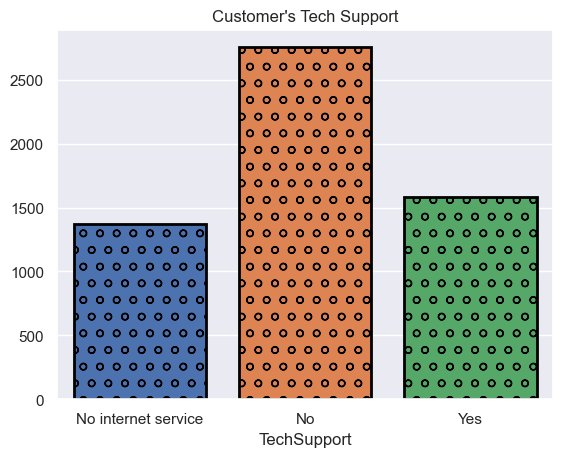

In [81]:
sns.barplot(x=tech_support.value_counts()[::-1].index,y=tech_support.value_counts()[::-1].values,saturation=1,lw=2,ec="black",hatch="o")
plt.title("Customer's Tech Support")
plt.xticks(ticks=[0,1,2],labels=["No internet service","No","Yes"])

plt.savefig("../visualizations/exploration/tech_support.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.24,0.48,0.27)**

In [82]:
Q1 = tech_support.quantile(.25)
Q3 = tech_support.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 3.5
Lower Bound: -0.5


In [83]:
# Outlier detection Using IQR
iqr_outliers = tech_support[(tech_support > upper_bound) |  (tech_support < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [84]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(tech_support):.2%}")

Correlation Cofficient: 5.29%


**Tech Support** has a low impact on **Churn**.

### StreamingTV:
Whether the customer has streaming TV service (e.g., "Yes", "No", or "No internet service").

In [85]:
streamingtv = data.StreamingTV.map(dict(zip(["No internet service","No","Yes"],[0,1,2])))

# Data Type
print(streamingtv.dtype,", Categorical Multinomial")

int64 , Categorical Multinomial


In [86]:
# Descriptive Statistics
streamingtv.describe()

count    5714.000000
mean        1.141932
std         0.776187
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: StreamingTV, dtype: float64

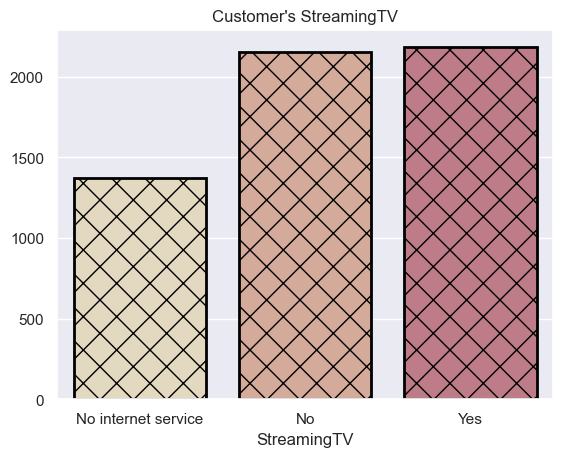

In [87]:
sns.barplot(x=streamingtv.value_counts()[::-1].index,y=streamingtv.value_counts()[::-1].values,palette=sns.color_palette("ch:s=-.2,r=.6"),saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's StreamingTV")
plt.xticks(ticks=[0,1,2],labels=["No internet service","No","Yes"])

plt.savefig("../visualizations/exploration/streamingtv.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.24,0.37,0.38)**

In [88]:
Q1 = streamingtv.quantile(.25)
Q3 = streamingtv.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 3.5
Lower Bound: -0.5


In [89]:
# Outlier detection Using IQR
iqr_outliers = streamingtv[(streamingtv > upper_bound) |  (streamingtv < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [90]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(streamingtv):.2%}")

Correlation Cofficient: 18.26%


**StreamingTV** has a middle lower impact on **Churn**.

### StreamingMovies:
Whether the customer has StreamingMovies (e.g., "Yes", "No", or "No internet service").

In [91]:
streaming_movies = data.StreamingMovies.map(dict(zip(["No internet service","No","Yes"],[0,1,2])))

# Data Type
print(streaming_movies.dtype,", Categorical Multinomial")

int64 , Categorical Multinomial


In [92]:
# Descriptive Statistics
streaming_movies.describe()

count    5714.000000
mean        1.144382
std         0.777313
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: StreamingMovies, dtype: float64

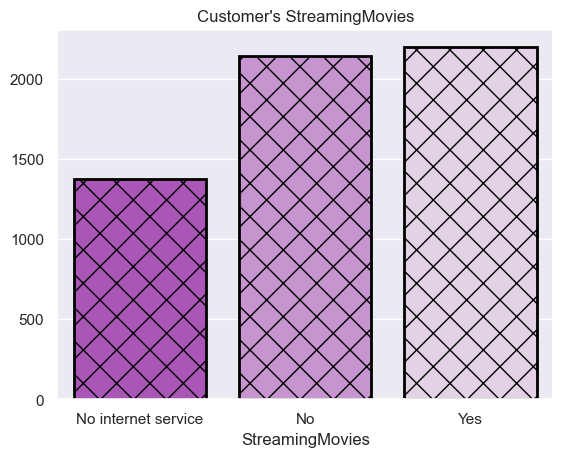

In [93]:
sns.barplot(x=streaming_movies.value_counts()[::-1].index,y=streaming_movies.value_counts()[::-1].values,palette=sns.diverging_palette(300,145, s=60)
,saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's StreamingMovies")
plt.xticks(ticks=[0,1,2],labels=["No internet service","No","Yes"])

plt.savefig("../visualizations/exploration/streaming_movies.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.24,0.37,0.38)**

In [94]:
Q1 = streaming_movies.quantile(.25)
Q3 = streaming_movies.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 3.5
Lower Bound: -0.5


In [95]:
# Outlier detection Using IQR
iqr_outliers = streaming_movies[(streaming_movies > upper_bound) |  (streaming_movies < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [96]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(streaming_movies):.2%}")

Correlation Cofficient: 17.78%


**StreamingMovies** has a low impact on **Churn**.

### Contract:
The type of contract the customer has (e.g., "Month-to-month", "One year", "Two year").

In [97]:
contract = data.Contract.map(dict(zip(["Month-to-month","One year","Two year"],[0,1,2])))

# Data Type
print(contract.dtype,", Categorical Multinomial")

int64 , Categorical Multinomial


In [98]:
# Descriptive Statistics
contract.describe()

count    5714.000000
mean        0.689184
std         0.833400
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Contract, dtype: float64

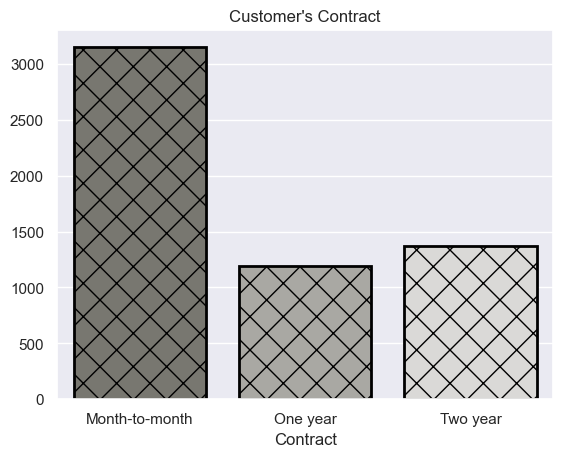

In [99]:
sns.barplot(x=contract.value_counts()[::-1].index,y=contract.value_counts()[::-1].values,palette=sns.diverging_palette(800,400, s=10)
,saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's Contract")
plt.xticks(ticks=[0,1,2],labels=["Month-to-month","One year","Two year"])

plt.savefig("../visualizations/exploration/contact.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.55,0.20,0.24)**

In [100]:
Q1 = contract.quantile(.25)
Q3 = contract.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 2.5
Lower Bound: -1.5


In [101]:
# Outlier detection Using IQR
iqr_outliers = contract[(contract > upper_bound) |  (contract < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [102]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(contract):.2%}")

Correlation Cofficient: -39.79%


**Contract** has a middle impact on **Churn**.

### PaperlessBilling:
Whether the customer has paperless billing (e.g., "Yes" or "No").

In [103]:
paper_billing = data.PaperlessBilling.map(dict(zip(["No","Yes"],[0,1])))

# Data Type
print(paper_billing.dtype,", Categorical Binary")

int64 , Categorical Binary


In [104]:
# Descriptive Statistics
paper_billing.describe()

count    5714.000000
mean        0.593455
std         0.491232
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PaperlessBilling, dtype: float64

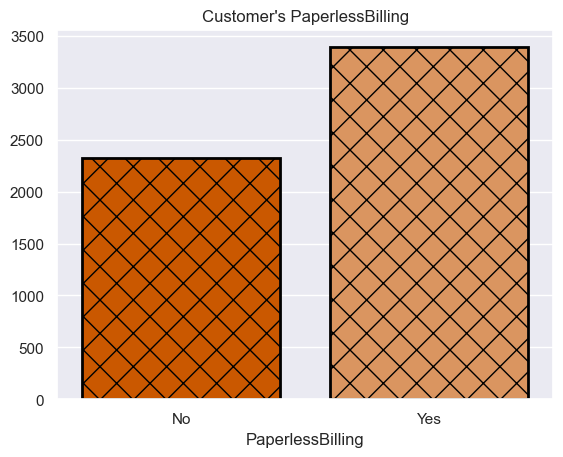

In [105]:
sns.barplot(x=paper_billing.value_counts()[::-1].index,y=paper_billing.value_counts()[::-1].values,palette=sns.diverging_palette(40,0, s=200)
,saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's PaperlessBilling")
plt.xticks(ticks=[0,1],labels=["No","Yes"])

plt.savefig("../visualizations/exploration/paper_billing.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Bern~(0.6)**

In [106]:
Q1 = paper_billing.quantile(.25)
Q3 = paper_billing.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1.0
Upper Bound: 2.5
Lower Bound: -1.5


In [107]:
# Outlier detection Using IQR
iqr_outliers = paper_billing[(paper_billing > upper_bound) |  (paper_billing < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [108]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(paper_billing):.2%}")

Correlation Cofficient: 19.95%


**PaperBilling** has a middle lower impact on **Churn**.

### PaymentMethod:
The payment method the customer uses (e.g., "Bank transfer (automatic)", "Credit card (automatic)", "Electronic check", "Mailed check").

In [109]:
payment_method = data.PaymentMethod.map(dict(zip(['Bank transfer (automatic)','Mailed check','Credit card (automatic)','Electronic check'],[0,1,2,3])))

# Data Type
print(payment_method.dtype,", Categorical Multiclass")

int64 , Categorical Multiclass


In [110]:
# Descriptive Statistics
payment_method .describe()

count    5714.000000
mean        1.668008
std         1.155449
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: PaymentMethod, dtype: float64

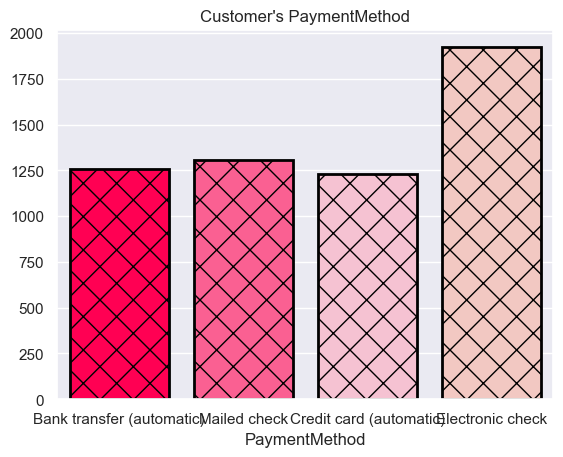

In [111]:
sns.barplot(x=payment_method.value_counts()[::-1].index,y=payment_method.value_counts()[::-1].values,palette=sns.diverging_palette(1,20, s=150)
,saturation=1,lw=2,ec="black",hatch="X")
plt.title("Customer's PaymentMethod")
plt.xticks(ticks=[0,1,2,3],labels=['Bank transfer (automatic)','Mailed check','Credit card (automatic)','Electronic check'])

plt.savefig("../visualizations/exploration/payment_method.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Cat~(0.21,0.22,0.21,0.33)**

In [112]:
Q1 = payment_method.quantile(.25)
Q3 = payment_method.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 2.0
Upper Bound: 6.0
Lower Bound: -2.0


In [113]:
# Outlier detection Using IQR
iqr_outliers = payment_method[(payment_method > upper_bound) |  (payment_method < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [114]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(payment_method):.2%}")

Correlation Cofficient: 24.47%


**PaymentMethod** has a middle lower impact on **Churn**.

### MonthlyCharges:
The amount the customer is charged monthly for the service (in USD).

In [115]:
monthly_charges = data.MonthlyCharges
# Data Type
print(monthly_charges.dtype)

float64


In [116]:
# Descriptive Statistics
monthly_charges .describe()

count    5714.000000
mean       67.244688
std        30.515017
min        18.400000
25%        44.700000
50%        74.750000
75%        91.500000
max       118.750000
Name: MonthlyCharges, dtype: float64

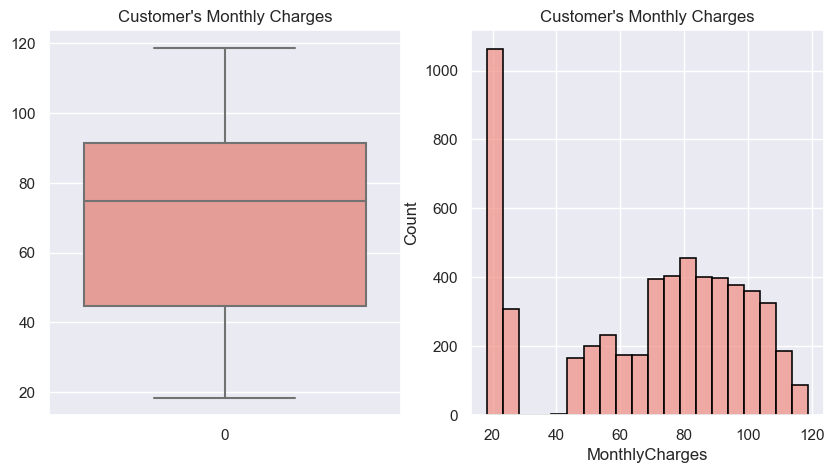

In [117]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(monthly_charges,color="#f1948a",ax=axs[0])
sns.histplot(x=monthly_charges,lw=2,ec="black",color="#f1948a",ax=axs[1])
axs[0].set_title("Customer's Monthly Charges")
axs[1].set_title("Customer's Monthly Charges")

plt.savefig("../visualizations/exploration/monthly_charges.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **N~(67,900)**

In [118]:
Q1 = monthly_charges.quantile(.25)
Q3 = monthly_charges.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 46.8
Upper Bound: 161.7
Lower Bound: -25.499999999999986


In [119]:
# Outlier detection Using IQR
iqr_outliers = monthly_charges[(monthly_charges > upper_bound) |  (monthly_charges < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [120]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(monthly_charges):.2%}")

Correlation Cofficient: 21.50%


**Monthly Charges** has a middle lower impact on **Churn**.

### TotalCharges:
The total amount the customer has been charged (in USD). This might need conversion from object type to numeric.

In [38]:
def temp_clean(X):
    try:
        X = float(X)
    except:
        X = None
    return X

In [39]:
total_charges = data.TotalCharges.apply(temp_clean)
# Data Type
print(total_charges.dtype)

float64


In [40]:
# Descriptive Statistics
total_charges.describe()

count    5707.000000
mean     2364.628544
std      2330.649829
min        18.850000
25%       412.800000
50%      1415.550000
75%      4017.150000
max      8684.800000
Name: TotalCharges, dtype: float64

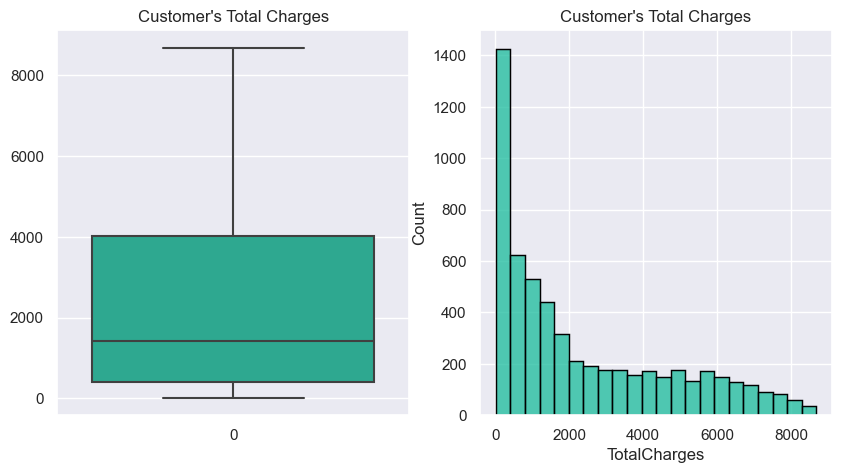

In [41]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(total_charges,color="#1abc9c",ax=axs[0])
sns.histplot(x=total_charges,lw=2,ec="black",color="#1abc9c",ax=axs[1])
axs[0].set_title("Customer's Total Charges")
axs[1].set_title("Customer's Total Charges")

plt.savefig("../visualizations/exploration/total_charges.png", dpi=300, bbox_inches='tight')
plt.show()

- Distribution follows **Exp~(0.0004)**

In [42]:
Q1 = total_charges.quantile(.25)
Q3 = total_charges.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 3604.3499999999995
Upper Bound: 9423.675
Lower Bound: -4993.724999999999


In [43]:
# Outlier detection Using IQR
iqr_outliers = total_charges[(total_charges > upper_bound) |  (total_charges < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  0
IQR Outliers:  Index([], dtype='int64')


In [44]:
# Usefulness for the task
print(f"Correlation Cofficient: {churn.corr(total_charges):.2%}")

Correlation Cofficient: -19.38%


**Total Charges** has a middle lower impact on **Churn**.

## Bivariate Analysis

### InternetService vs Contract
Check which contract types are popular for each internet service.

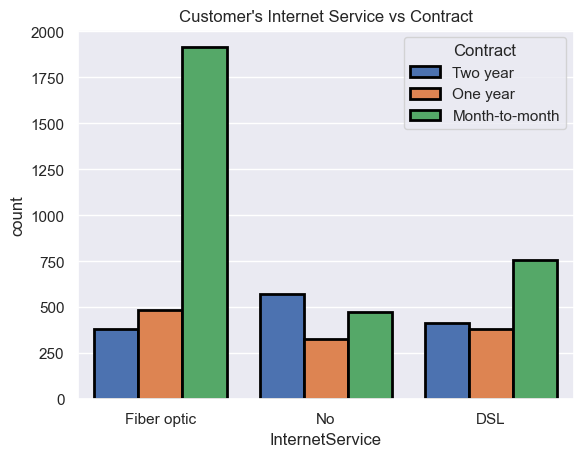

In [128]:
sns.countplot(data=data,x="InternetService",hue="Contract",saturation=1,lw=2,edgecolor="black",hatch="")
plt.title("Customer's Internet Service vs Contract")

plt.savefig("../visualizations/exploration/internet_serviceVscontract.png",dpi=300, bbox_inches='tight')
plt.show()

- Its obvious that **Fiber optic** is most common for **month-to-month** contract.
- Same for **DSL**.
- For **No Internet Service** its uniform. 

### PaymentMethod vs PaperlessBilling
See which payment methods are linked to paperless billing.

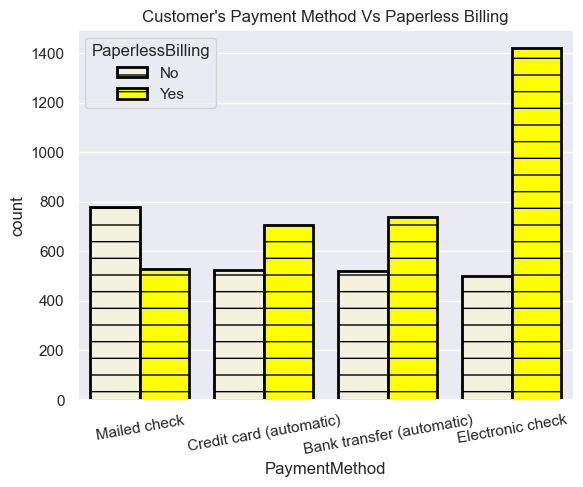

In [129]:
sns.countplot(x=data.PaymentMethod[::-1],hue=data.PaperlessBilling[::-1],saturation=1,lw=2,color="yellow",ec="black",hatch="-")
plt.title("Customer's Payment Method Vs Paperless Billing")
plt.xticks(rotation=10)

plt.savefig("../visualizations/exploration/PaymentMethodVsPaperlessBilling.png",dpi=300, bbox_inches='tight')
plt.show()

**Electronic check** has the most paperless billings.

### SeniorCitizen vs InternetService
Analyze which internet services are preferred by senior citizens.

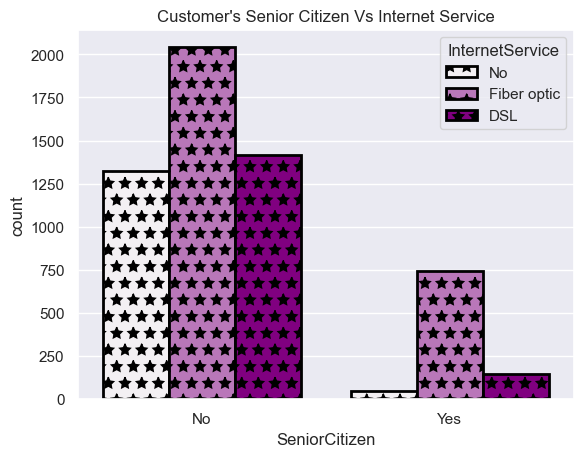

In [130]:
sns.countplot(x=data.SeniorCitizen[::-1],hue=data.InternetService[::-1],saturation=1,lw=2,color="purple",ec="black",hatch="*")
plt.title("Customer's Senior Citizen Vs Internet Service")
plt.xticks(ticks=[0,1],labels=["No","Yes"])

plt.savefig("../visualizations/exploration/SeniorCitizenVsInternetService.png",dpi=300, bbox_inches='tight')
plt.show()

### Tenure vs MonthlyCharges
Check if long-tenured customers pay less on average.

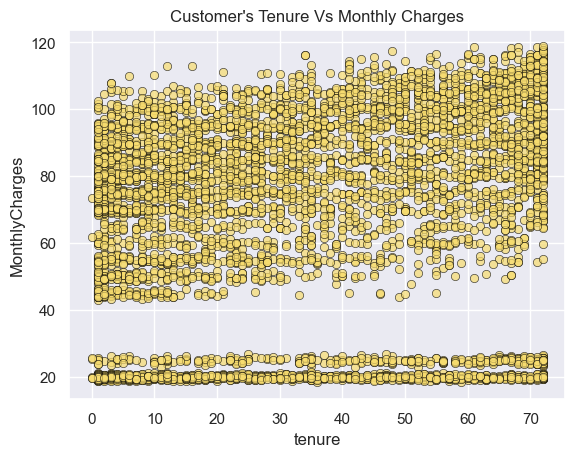

In [131]:
sns.scatterplot(x=tenure,y=monthly_charges,sizes=(20, 200),alpha=0.7,palette="viridis",color="#f7dc6f",edgecolor="black",linewidth=0.5)
plt.title("Customer's Tenure Vs Monthly Charges")

plt.savefig("../visualizations/exploration/TenureVsMonthlyCharges.png",dpi=300, bbox_inches='tight')
plt.show()

In [132]:
tenure.corr(monthly_charges)

0.24795037313160156

- When **Tenure** increases **Monthly Charges** increases also.

### InternetService vs MonthlyCharges
Compare charges across different internet service types.

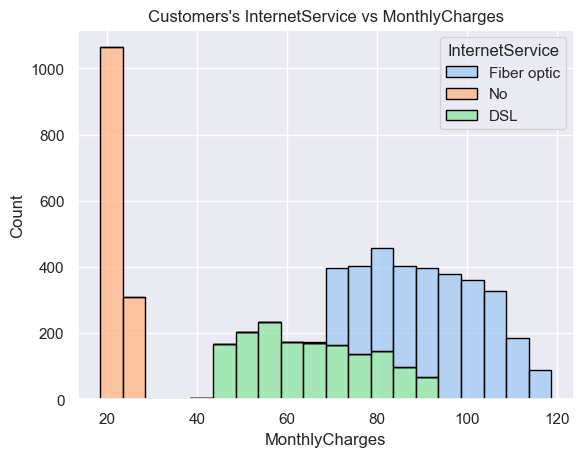

In [133]:
sns.histplot(data=data,x="MonthlyCharges",hue="InternetService",palette="pastel",multiple="stack",edgecolor="black")
plt.title("Customers's InternetService vs MonthlyCharges")

plt.savefig("../visualizations/exploration/InternetServiceVsMonthlyCharges.png",dpi=300, bbox_inches='tight')
plt.show()

We see that **Monthly Chargers** are higher for better **Internet Services** obviously.

### Dependents vs Partner
Explore the correlation between having dependents and a partner.

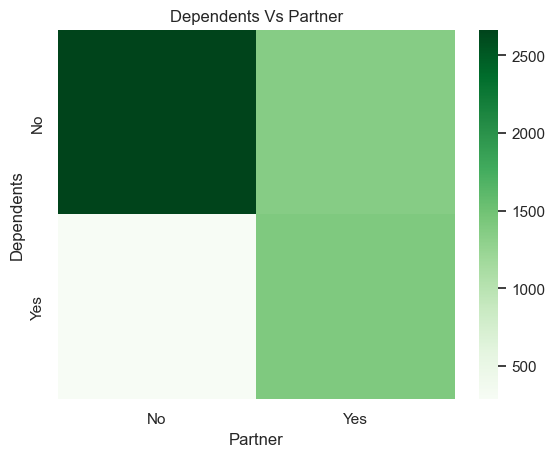

In [134]:
sns.heatmap(pd.crosstab(data.Dependents,data.Partner),cmap="Greens")
plt.title("Dependents Vs Partner")

plt.savefig("../visualizations/exploration/DependentsVsPartner.png",dpi=300,bbox_inches="tight")
plt.show()

- Most of Customers that dont have **Dependents** also dont have a **Partner**.
- Viceversa also right.

### Contract vs MonthlyCharges
Analyze how charges vary with contract type.

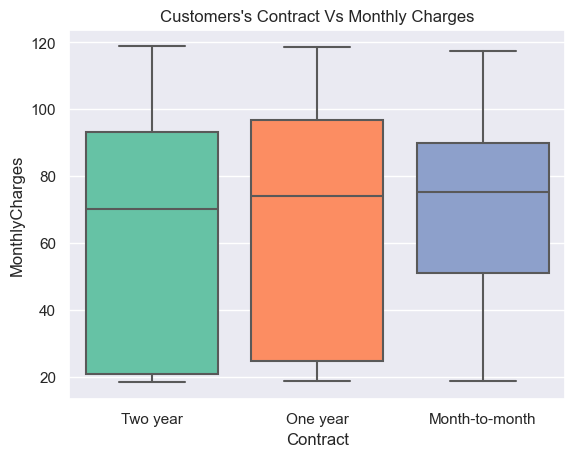

In [135]:
sns.boxplot(data=data,x="Contract", y="MonthlyCharges",palette="Set2",saturation=1)
plt.title("Customers's Contract Vs Monthly Charges")

plt.savefig("../visualizations/exploration/ContractVsMonthlyCharges.png", dpi=300, bbox_inches='tight')
plt.show()

### Churn Vs Rest

In [136]:
titles = []
corrs_with_target = []
for col in [gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,contract,paper_billing,payment_method,monthly_charges,total_charges]:
    corrs_with_target.append(churn.corr(col))
    titles.append(col.name)

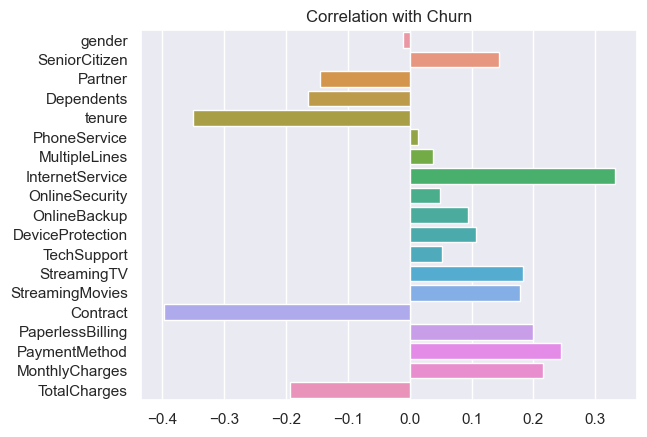

In [137]:
sns.barplot(y=titles,x=corrs_with_target)
plt.title("Correlation with Churn")
#plt.xticks(rotation=30)

plt.savefig("../visualizations/exploration/correlation_with_target.png",dpi=300,bbox_inches="tight")
plt.show()

We see that most of the features has a correlation with the **Churn** especially **Contract**, **Internet Service** and **Tenure**.

## Multivariate Analysis

In [138]:
numeric_data = pd.DataFrame({
    'gender': gender,
    'senior_citizen': senior_citizen,
    'partner': partner,
    'dependents': dependents,
    'tenure': tenure,
    'phone_service': phone_service,
    'multiple_lines': multiple_lines,
    'internet_service': internet_service,
    'online_security': online_security,
    'online_backup': online_backup,
    'device_protection': device_protection,
    'tech_support': tech_support,
    'streamingtv': streamingtv,
    'streaming_movies': streaming_movies,
    'contract': contract,
    'paper_billing': paper_billing,
    'payment_method': payment_method,
    'monthly_charges': monthly_charges,
    'total_charges': total_charges
})
numeric_data.tail(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streamingtv,streaming_movies,contract,paper_billing,payment_method,monthly_charges,total_charges
6336,0,0,1.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,20.40,482.8
6337,1,0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.65,109.3


### Features Interactions and Distributions

In [140]:
sns.pairplot(data=numeric_data,
    #kind="kde", 
    height=2.5, 
    aspect=1.2, 
    markers=["*", "+", "D", "s", "^"], 
    diag_kind="kde"
)
plt.title("Interactions & Distribution")

plt.savefig("../visualizations/exploration/features_interactions.png", dpi=300, bbox_inches='tight')
plt.show()


KeyboardInterrupt



### Features Correlation


In [141]:
corrs = numeric_data.corr()

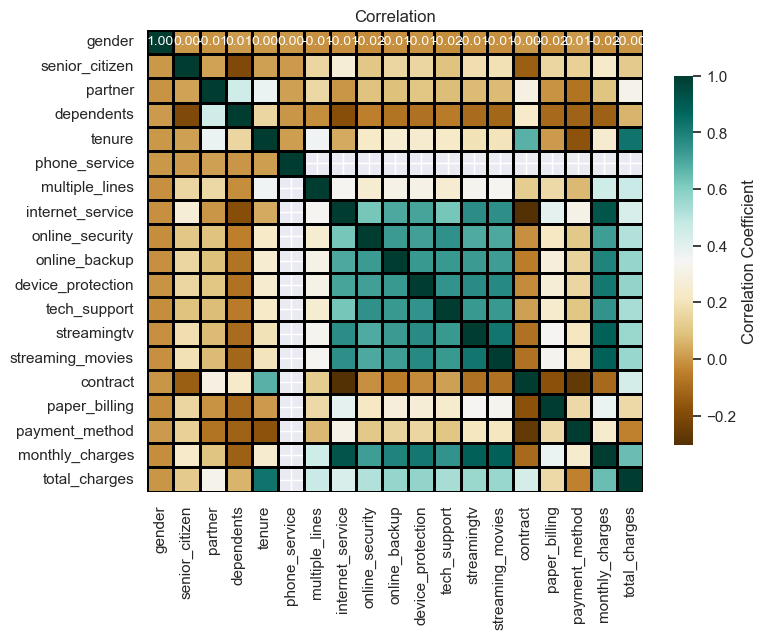

In [142]:
plt.figure(figsize=(8, 6))  
sns.heatmap(data=corrs,cmap="BrBG",annot=True,fmt=".2f",linewidths=2,linecolor="black",annot_kws={"size": 10},cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})
plt.title("Correlation")

plt.savefig("../visualizations/exploration/features_correlation.png", dpi=300, bbox_inches='tight')
plt.show()

In [45]:
# Save Cleaned Data from Outliers
data["TotalCharges"] = total_charges
data.to_csv("../data/train_processed_data.csv")